##Project Preliminary Data Analysis

###Problem Statement and Background (2 points)
A high-level statement of the problem you intend to address, e.g. finding correspondences between neural recordings and DNN layers. Try to translate the high-level into specific questions if you can.
Give background on the problem you are solving: why it is interesting, who is interested, what is known, some references about it, etc.

###The Data Source(s) You Are Using (2 points)
Describe the data source(s) you have. How much data you have now, and how much you expect to use for your final analysis. We will need that information soon so we can get the necessary data to you.

###Data Joining/Cleaning You Did (4 points)
If data is being joined, describe the joining process and any problems with it - explain the metric used for fuzzy joins.
Explain how you will handle missing or duplicate keys. Describe the tools you used to examine/repair/clean the data.
If you found any statistical anomalies last time, explain how you plan to deal with them.


In [1]:
import json
import pandas as pd
import sys
import os
import numpy as np
%matplotlib inline

We are trying to featurize restaurants in the yelp dataset and use those feature vectors to predict the rating of the business based on the business metadata and the reviews a business recieves.

The first step is to load the biz dataset into a dataframe which we will then start to featurize.

In [16]:
#Load Biz Dataset into DF
biz_data = []
biz_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
with open(biz_fn) as data_file:
    for line in data_file:
        biz_data.append(json.loads(line))
biz_df = pd.DataFrame(biz_data)
biz_df

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350519,-79.886930,Clancy's Pub,[],True,4,3.5,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.356896,-80.015910,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon Wireless,[],True,3,3.5,PA,business
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business
5,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106",{},40.415517,-80.067534,Alexion's Bar & Grill,[Greentree],True,15,4.0,PA,business
6,{},b12U9TFESStdy7CsTtcOeg,"[Auto Repair, Automotive]",Carnegie,"718 Hope Hollow Rd\nCarnegie, PA 15106",{},40.394588,-80.084454,Flynn's E W Tire Service Center,[],True,5,1.5,PA,business
7,{u'Good for Kids': True},Sktj1eHQFuVa-M4bgnEh8g,"[Active Life, Mini Golf]",Carnegie,"920 Forsythe Rd\nCarnegie\nCarnegie, PA 15106",{},40.405404,-80.076267,Forsythe Miniature Golf & Snacks,[Carnegie],True,4,4.0,PA,business
8,{},3ZVKmuK2l7uXPE6lXY4Dbg,"[Home Services, Contractors]",Carnegie,"8 Logan St\nCarnegie\nCarnegie, PA 15106",{},40.406324,-80.090357,Quaker State Construction,[Carnegie],True,3,2.5,PA,business
9,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],True,8,3.5,PA,business


The next step is to filter our non restaurant related categories from the business data set because we are only interested in restaurants.

In [27]:
#filtering businesses into restaurants
category_csv = 'restaurantcategories.csv'
all_categories = []
restaurants = []
category_mapper = {}
i = 0
with open(category_csv) as categories:
    for line in categories:
        all_categories.append(line)
biz_dict = biz_df.to_dict()
all_categories = all_categories[0].split('\r')
for category in all_categories:
    category_mapper[category] = i
    i+=1
for index in biz_dict['categories'].keys():
    if len(biz_dict['categories'][index]) == 0:
        for col in biz_dict.keys():
                del biz_dict[col][index] 
    elif len(biz_dict['categories'][index]) > 0:
        allInCats = True
        for elem in biz_dict['categories'][index]:
            if elem not in all_categories:
                allInCats = False
                break;
        if not allInCats:
            for col in biz_dict.keys():
                del biz_dict[col][index] 
                
res_df = pd.DataFrame(biz_dict)  

In [4]:
res_df.shape
res_df.to_csv('res_df.csv', encoding='utf-8')

Now we want to load the review dataset into a pandas dataframe.

In [5]:
#Load review dataset into df
review_data = []
review_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json'
with open(review_fn) as data_file:
    for line in data_file:
        review_data.append(json.loads(line))
review_df = pd.DataFrame(review_data)

###Analysis Approach (3 points)
Describe what analysis you are doing: This will probably comprise:
Featurization: Explain how you generated features from the raw data. e.g. thresholding to produce binary features, binning, tf-idf, multinomial -> multiple binary features (one-hot encoding). Describe any value transformations you did, e.g. histogram normalization.
Modeling: Which machine learning models did you try? Which do you plan to try in the future?
Performance measurement: How will you evaluate your model and improve featurization etc.

####Featurization

Since our goal is to predict the rating of a yelp restaurant. We want to train a classifier on a training set. The features we ended up using were the following:

1. City Location To City Center (Floating Point number in miles)
2. Average Number of words in the set of reviews for a business. (Integer)
3. Number of Reviews for a business. (Integer)
4. TF-IDF of every word in the set of words for a business. (Integer)
5. Category (Binned Integer)

In [12]:
review_df.shape

(1569264, 8)

Lets add a column distance to the business dataframe which indicates the haversine distance of a business to its city center.

In [38]:
#adds a column "distance" which is the distance of this business to its city center. 
#The result is new_res_df which is just res_df with this additional column

from haversine import haversine

cityCenterLocations = dict()

cityCenterLocations['Edinburgh'] = [55.9531, -3.1889]
cityCenterLocations['Karlsruhe'] =  [49.0092, 8.4040]
cityCenterLocations['Montreal'] = [45.5017, -73.5673]
cityCenterLocations['Waterloo'] = [43.4667, -80.5167]
cityCenterLocations['Pittsburgh'] = [40.4397, -79.9764]
cityCenterLocations['Charlotte'] = [35.2269, -80.8433]
cityCenterLocations['Urbana-Champaign'] = [40.1097, -88.2042]
cityCenterLocations['Phoenix'] = [33.4500, -112.0667]
cityCenterLocations['Las Vegas'] = [36.1215, -115.1739]
cityCenterLocations['Madison'] = [43.0667, -89.4000]

dictOfLists = {'business_id': [], 'distance': []}

for index, row in res_df.iterrows():
    location = (row['latitude'], row['longitude'])
    minDistance = float("inf")
    for cityCenter in cityCenterLocations:
        centerlocation = cityCenterLocations[cityCenter]
        distance = haversine(location, (centerlocation[0], centerlocation[1]), miles=True)
        if distance < minDistance:
            minDistance = distance
    dictOfLists['business_id'].append(row['business_id'])
    dictOfLists['distance'].append(minDistance)

distDF = pd.DataFrame(dictOfLists)

new_res_df = pd.merge(res_df, distDF, on='business_id')
new_res_df
    

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,distance
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],True,8,3.5,PA,business,7.101866
1,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.396744,-80.084800,Gab & Eat,[],True,38,4.5,PA,business,6.428321
2,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",zaXDakTd3RXyOa7sMrUE1g,"[Cafes, Restaurants]",Carnegie,"202 3rd Ave\nCarnegie\nCarnegie, PA 15106",{},40.404638,-80.089985,Barb's Country Junction Cafe,[Carnegie],True,5,4.0,PA,business,6.447019
3,"{u'Take-out': True, u'Accepts Credit Cards': T...",rv7CY8G_XibTx82YhuqQRw,[Restaurants],Carnegie,"Raceway Plz\nCarnegie, PA 15106",{},40.386891,-80.093704,Long John Silver's,[],True,3,3.5,PA,business,7.168961
4,"{u'Take-out': True, u'Alcohol': u'none', u'Noi...",SQ0j7bgSTazkVQlF5AnqyQ,"[Chinese, Restaurants]",Carnegie,"214 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.408343,-80.084861,Don Don Chinese Restaurant,[Carnegie],True,8,2.5,PA,business,6.102425
5,"{u'Take-out': True, u'Accepts Credit Cards': T...",wqu7ILomIOPSduRwoWp4AQ,"[Breakfast & Brunch, American (Traditional), R...",Pittsburgh,"2180 Greentree Rd\nPittsburgh, PA 15220",{},40.391255,-80.073426,Denny's,[],True,7,4.0,PA,business,6.103717
6,"{u'Take-out': True, u'Accepts Credit Cards': T...",P1fJb2WQ1mXoiudj8UE44w,"[Restaurants, Italian]",Carnegie,"200 E Main St\nCarnegie\nCarnegie, PA 15106","{u'Monday': {u'close': u'22:00', u'open': u'11...",40.408257,-80.085458,Papa J's,[Carnegie],True,46,3.5,PA,business,6.133901
7,"{u'Take-out': True, u'Accepts Credit Cards': T...",PK6aSizckHFWk8i0oxt5DA,"[Burgers, Fast Food, Restaurants]",Homestead,"400 Waterfront Dr E\nHomestead\nHomestead, PA ...",{},40.412086,-79.910032,McDonald's,[Homestead],True,5,2.0,PA,business,3.978142
8,"{u'Attire': u'casual', u'Parking': {u'garage':...",sRqB6flj3GtTZIZJQxf_oA,[Restaurants],Homestead,"285 Waterfront Dr E\nHomestead\nHomestead, PA ...",{},40.411692,-79.912343,Eat'n Park Hospitality Group,[Homestead],True,3,2.5,PA,business,3.885432
9,"{u'Take-out': True, u'Accepts Credit Cards': T...",6ilJq_05xRgek_8qUp36-g,"[Burgers, Fast Food, Restaurants]",Munhall,"650 E Waterfront Dr\nHomestead\nMunhall, PA 1...","{u'Monday': {u'close': u'00:00', u'open': u'00...",40.413496,-79.904456,Steak 'n Shake,[Homestead],True,36,2.0,PA,business,4.194822


The next set of features is based on the review and business dataframes so let us perform an inner join o hte business ID.

In [39]:
#Joins res_df and review_df on business_id

import numpy as np

per_biz = dict()
random_indices = np.random.choice(len(review_df), 100000)
RestaurantReviewsJoined = pd.merge(res_df, review_df, on='business_id')
RestaurantReviewsJoinedDict

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,stars_x,state,type_x,date,review_id,stars_y,text,type_y,user_id,votes
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],...,3.5,PA,business,2009-12-10,XW_RwDoN9StbDt0Y1pc3VA,3,I have never seen a restaurant that has a frow...,review,T_wjLgPOPXry7Bea4MzoVQ,"{u'funny': 1, u'useful': 2, u'cool': 3}"
1,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],...,3.5,PA,business,2010-01-03,LOqF4d657XomJGRKpFKlhg,3,"So... back in the late 90s, there used to be t...",review,LaPatM6c289ClpysmzZpdQ,"{u'funny': 1, u'useful': 1, u'cool': 0}"
2,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],...,3.5,PA,business,2010-11-06,e2YxtsZJE3w6DdNP8yMs7w,4,Ive pretty much been eating at various Kings' ...,review,vGI3dbg5zFRXBg4eVVmGSg,"{u'funny': 0, u'useful': 0, u'cool': 0}"
3,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],...,3.5,PA,business,2011-11-21,RRddfCx_goh5UnEIwx9HMA,2,Hoofah.,review,9MmWbiE7txW_OplDAnoaqA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
4,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],...,3.5,PA,business,2012-05-30,bgLHVU09FpJ-uEOFFor6uA,4,I heart King's. I've always been a fan and thi...,review,q7MrNVt1FE23rwtWmPYWHg,"{u'funny': 0, u'useful': 0, u'cool': 1}"
5,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],...,3.5,PA,business,2014-09-18,pLkbUd2H5ducEeJPi1BPGw,4,I arrived around 10 am on a Saturday morning. ...,review,7KoVg5QMjYu8taLFSE7hNA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
6,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],...,3.5,PA,business,2015-01-01,yJFDmUvxlPRdzG7GPSAXKw,5,"thisis not the closest Kings to us, but we oft...",review,G4PZXgVGd-6zG9jJBQNl5A,"{u'funny': 0, u'useful': 0, u'cool': 0}"
7,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.396744,-80.084800,Gab & Eat,[],...,4.5,PA,business,2007-03-31,Phd_OwFhKQptiVL5Tbl-Lw,3,If you want a true understanding of Pittsburgh...,review,PrMlXX6fbMsJie9ausN41g,"{u'funny': 0, u'useful': 2, u'cool': 1}"
8,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.396744,

Now that we have the biz_review_joined dataframe. The next step is to generate our features from them. 

In [41]:
'''
Outputs a dictionary per_biz which has a key business_id and value a list, where the first element is total number 
of words in reviews for that business, and the second element is number of reviews for that business.

Will use this dict to compute average number of words in a review for a business.
'''

for index, row in RestaurantReviewsJoinedDict.iterrows():
    if row['business_id'] not in per_biz.keys():
        per_biz[row['business_id']] = [0, 0]
    else:
        per_biz[row['business_id']][1] += 1
        wordcount = len(row['text'].encode('utf8').split())
        per_biz[row['business_id']][0] += wordcount
    

In [42]:
per_biz

{u'OlpyplEJ_c_hFxyand_Wxw': [6149, 58],
 u'_qvxFHGbnbrAPeWBVifJEQ': [1359, 17],
 u'3bwxfBvKABepxYWGz3pHXA': [3437, 34],
 u'ny1T3dzXf8_ySXkFv37qwQ': [790, 16],
 u's5yzZITWU_RcJzWOgjFecw': [10882, 72],
 u'fWQqaAaOon3XkFqPFYgo6Q': [342, 4],
 u'dbMpGh4p9dTxSn5lDSKE3w': [2014, 19],
 u'VZYMInkjRJVHwXVFqeoMWg': [551, 3],
 u'qcylQLL-fXdFHrdXC2jZFw': [9790, 73],
 u'yghonKu_3q4Iu08HbNsyOQ': [3391, 28],
 u'51QMwutUI352Gmb3t1aryw': [347, 5],
 u'DB5rZ9spvyhBJsqOwckncw': [1741, 14],
 u'8buIr1zBCO7OEcAQSZko7w': [164249, 1224],
 u'gq7u9uyOkpLCeh_lxR-WFw': [12009, 88],
 u'nZww1gdBAi9HtRKiQHL2qA': [4619, 29],
 u'Cko88SO9YEsg8jZEXke81w': [2076, 21],
 u'ke3RFq3mHEAoJE_kkRNhiQ': [46660, 315],
 u'SNpVV5viJ2aPylP6bkAx8Q': [2251, 29],
 u'fx4coO0OyW7Qe8vdLnlLiA': [2114, 9],
 u'3m7khDnqH9QOg8gu3Ymumw': [947, 5],
 u'3ntET8y1imh854cMN49WYg': [76, 2],
 u'5TBOg9Rf47SECB8gTNGqeQ': [6004, 56],
 u'7Y1lfzFkwBRoMZKIMMeZMw': [1043, 11],
 u'1HmLi5NNs0_FDYYxBgRxzw': [339, 4],
 u'APzio4blbje5mhMGJqP8Ew': [257, 4],
 u'i_H_yK

In [43]:
#AvgWordsDF is a dataframe with two columns, business id, and the average number of words in its reviews.

dictOfLists = {'business_id': [], 'AverageWordsInReviews': []}

for elem in per_biz:
    dictOfLists['business_id'].append(elem)
    if per_biz[elem][1] == 0:
        dictOfLists['AverageWordsInReviews'].append(0)
    else:
        dictOfLists['AverageWordsInReviews'].append(per_biz[elem][0]/float(per_biz[elem][1]))

avgWordsDF = pd.DataFrame(dictOfLists)

avgWordsDF
    

,AverageWordsInReviews,business_id
0,106.017241,OlpyplEJ_c_hFxyand_Wxw
1,79.941176,_qvxFHGbnbrAPeWBVifJEQ
2,101.088235,3bwxfBvKABepxYWGz3pHXA
3,49.375000,ny1T3dzXf8_ySXkFv37qwQ
4,151.138889,s5yzZITWU_RcJzWOgjFecw
5,85.500000,fWQqaAaOon3XkFqPFYgo6Q
6,106.000000,dbMpGh4p9dTxSn5lDSKE3w
7,183.666667,VZYMInkjRJVHwXVFqeoMWg
8,134.109589,qcylQLL-fXdFHrdXC2jZFw
9,121.107143,yghonKu_3q4Iu08HbNsyOQ


In [44]:
#Joining AverageWordsDF with the new_res_df to get the latest restuarant dataframe with an added column

new_res_df_with_avg_words = pd.merge(new_res_df, avgWordsDF, on='business_id')
new_res_df_with_avg_words

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,distance,AverageWordsInReviews
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],True,8,3.5,PA,business,7.101866,96.666667
1,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.396744,-80.084800,Gab & Eat,[],True,38,4.5,PA,business,6.428321,111.818182
2,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",zaXDakTd3RXyOa7sMrUE1g,"[Cafes, Restaurants]",Carnegie,"202 3rd Ave\nCarnegie\nCarnegie, PA 15106",{},40.404638,-80.089985,Barb's Country Junction Cafe,[Carnegie],True,5,4.0,PA,business,6.447019,130.500000
3,"{u'Take-out': True, u'Accepts Credit Cards': T...",rv7CY8G_XibTx82YhuqQRw,[Restaurants],Carnegie,"Raceway Plz\nCarnegie, PA 15106",{},40.386891,-80.093704,Long John Silver's,[],True,3,3.5,PA,business,7.168961,57.000000
4,"{u'Take-out': True, u'Alcohol': u'none', u'Noi...",SQ0j7bgSTazkVQlF5AnqyQ,"[Chinese, Restaurants]",Carnegie,"214 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.408343,-80.084861,Don Don Chinese Restaurant,[Carnegie],True,8,2.5,PA,business,6.102425,118.333333
5,"{u'Take-out': True, u'Accepts Credit Cards': T...",wqu7ILomIOPSduRwoWp4AQ,"[Breakfast & Brunch, American (Traditional), R...",Pittsburgh,"2180 Greentree Rd\nPittsburgh, PA 15220",{},40.391255,-80.073426,Denny's,[],True,7,4.0,PA,business,6.103717,61.000000
6,"{u'Take-out': True, u'Accepts Credit Cards': T...",P1fJb2WQ1mXoiudj8UE44w,"[Restaurants, Italian]",Carnegie,"200 E Main St\nCarnegie\nCarnegie, PA 15106","{u'Monday': {u'close': u'22:00', u'open': u'11...",40.408257,-80.085458,Papa J's,[Carnegie],True,46,3.5,PA,business,6.133901,126.568182
7,"{u'Take-out': True, u'Accepts Credit Cards': T...",PK6aSizckHFWk8i0oxt5DA,"[Burgers, Fast Food, Restaurants]",Homestead,"400 Waterfront Dr E\nHomestead\nHomestead, PA ...",{},40.412086,-79.910032,McDonald's,[Homestead],True,5,2.0,PA,business,3.978142,220.333333
8,"{u'Attire': u'casual', u'Parking': {u'garage':...",sRqB6flj3GtTZIZJQxf_oA,[Restaurants],Homestead,"285 Waterfront Dr E\nHomestead\nHomestead, PA ...",{},40.411692,-79.912343,Eat'n Park Hospitality Group,[Homestead],True,3,2.5,PA,business,3.885432,119.666667
9,"{u'Take-out': True, u'Accepts Credit Cards': T...",6ilJq_05xRgek_8qUp36-g,"[Burgers, Fast Food, Restaurants]",Munhall,"650 E Waterfront Dr\nHomestead\nMunhall, PA 1...","{u'Monday': {u'close': u'00:00', u'open': u'00...",40.413496,-79.904456,Steak 'n Shake,[Homestead],True,36,2.0,PA,business,4.194822,96.225806


The next step is to bucket the categories.

In [48]:
holder = []
for index in new_res_df_with_avg_words.index:
    row = new_res_df_with_avg_words.ix[index]
    cats = row['categories']
    count = 0
    for cat in cats:
        count+=category_mapper[cat]
    holder.append(count)
new_res_df_with_avg_words['category_feature'] = holder
new_res_df_with_avg_words

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,distance,AverageWordsInReviews,category_feature
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],True,8,3.5,PA,business,7.101866,96.666667,160
1,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.396744,-80.084800,Gab & Eat,[],True,38,4.5,PA,business,6.428321,111.818182,134
2,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",zaXDakTd3RXyOa7sMrUE1g,"[Cafes, Restaurants]",Carnegie,"202 3rd Ave\nCarnegie\nCarnegie, PA 15106",{},40.404638,-80.089985,Barb's Country Junction Cafe,[Carnegie],True,5,4.0,PA,business,6.447019,130.500000,139
3,"{u'Take-out': True, u'Accepts Credit Cards': T...",rv7CY8G_XibTx82YhuqQRw,[Restaurants],Carnegie,"Raceway Plz\nCarnegie, PA 15106",{},40.386891,-80.093704,Long John Silver's,[],True,3,3.5,PA,business,7.168961,57.000000,116
4,"{u'Take-out': True, u'Alcohol': u'none', u'Noi...",SQ0j7bgSTazkVQlF5AnqyQ,"[Chinese, Restaurants]",Carnegie,"214 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.408343,-80.084861,Don Don Chinese Restaurant,[Carnegie],True,8,2.5,PA,business,6.102425,118.333333,151
5,"{u'Take-out': True, u'Accepts Credit Cards': T...",wqu7ILomIOPSduRwoWp4AQ,"[Breakfast & Brunch, American (Traditional), R...",Pittsburgh,"2180 Greentree Rd\nPittsburgh, PA 15220",{},40.391255,-80.073426,Denny's,[],True,7,4.0,PA,business,6.103717,61.000000,139
6,"{u'Take-out': True, u'Accepts Credit Cards': T...",P1fJb2WQ1mXoiudj8UE44w,"[Restaurants, Italian]",Carnegie,"200 E Main St\nCarnegie\nCarnegie, PA 15106","{u'Monday': {u'close': u'22:00', u'open': u'11...",40.408257,-80.085458,Papa J's,[Carnegie],True,46,3.5,PA,business,6.133901,126.568182,184
7,"{u'Take-out': True, u'Accepts Credit Cards': T...",PK6aSizckHFWk8i0oxt5DA,"[Burgers, Fast Food, Restaurants]",Homestead,"400 Waterfront Dr E\nHomestead\nHomestead, PA ...",{},40.412086,-79.910032,McDonald's,[Homestead],True,5,2.0,PA,business,3.978142,220.333333,184
8,"{u'Attire': u'casual', u'Parking': {u'garage':...",sRqB6flj3GtTZIZJQxf_oA,[Restaurants],Homestead,"285 Waterfront Dr E\nHomestead\nHomestead, PA ...",{},40.411692,-79.912343,Eat'n Park Hospitality Group,[Homestead],True,3,2.5,PA,business,3.885432,119.666667,116
9,"{u'Take-out': True, u'Accepts Credit Cards': T...",6ilJq_05xRgek_8qUp36-g,"[Burgers, Fast Food, Restaurants]",Munhall,"650 E Waterfront Dr\nHomestead\nMunhall, PA 1...","{u'Monday': {u'close': u'00:00', u'open': u'00...",40.413496,-79.904456,Steak 'n Shake,[Homestead],True,36,2.0,PA,business,4.194822,96.225806,184


In [21]:
#This cell gets the 200 most frequent words to compute TFIDF. Not working yet, taking too long to run 

from collections import Counter

print RestaurantReviewsJoinedDict.shape

counter = Counter()
for index, row in RestaurantReviewsJoinedDict.iterrows():
    print index
    words = []
    text = row['text'].encode('utf8')
    line = text.split()
    for elem in line:
        if len(elem) >= 3:
            words.append(elem)
    counter += Counter(words)
    
counter.most_common(10)

(738425, 22)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
2

KeyboardInterrupt: 

####Modeling

In [49]:
import sklearn
import scipy.io
from scipy import * 
from sklearn import svm
from random import shuffle

So given 17109 examples. We want to create a 80:20 split between the training set and the test set. Then we will perofrm an 80:20 split of the training set to create a new training and validation set. So in our case we will have 3422 samples in our test set, 10,949 samples in our training set and 2738 in our testing set.

In [56]:
def split_dataframes(df,div):
    '''
    Split df into 2 datasets where the first new_df has <div> rows and the 
    rest are thrown into new2_df.
    '''
    print("shuffle time")
    mix = range(len(df))
    shuffle(mix)
    print("Done shuffling")
    a_indices = mix[0:div]
    b_indices = mix[div:]
    new_df = pd.DataFrame(columns=df.columns,index=range(len(a_indices)))
    new2_df = pd.DataFrame(columns=df.columns,index=range(len(b_indices)))
    new_i = 0
    new2_i = 0
    print("Starting first df")
    for a_index in a_indices:
        new_df.ix[new_i] = df.ix[a_index]
        new_i+=1
    print("Second df time")
    for b_index in b_indices:
        new2_df.ix[new2_i] = df.ix[b_index]
        new2_i+=1
    new_df.index = range(len(new_df))
    new2_df.index = range(len(new2_df))
    return new_df,new2_df

In [57]:
train,test = split_dataframes(new_res_df_with_avg_words,13687)
print("Done with the first")
train,validation = split_dataframes(train,10949)

shuffle time
Done shuffling
Starting first df
Second df time
Done with the first
shuffle time
Done shuffling
Starting first df
Second df time


In [64]:
train_features = train[['review_count','distance','AverageWordsInReviews','category_feature']]
train_labels = train[['stars']]

test_features = test[['review_count','distance','AverageWordsInReviews','category_feature']]
test_labels = test[['stars']]

validation_features = validation[['review_count','distance','AverageWordsInReviews','category_feature']]
validation_labels = validation[['stars']]

In [67]:
train_features.values

array([[6, 1.0031563545807751, 114.2, 151],
       [40, 8.7456933397763006, 88.94736842105263, 205],
       [100, 21.622476655356365, 106.21052631578948, 184],
       ..., 
       [5, 7.003463457929036, 92.25, 196],
       [3, 5.6748054597354756, 0.0, 116],
       [63, 1.2836417608903341, 132.11864406779662, 196]], dtype=object)

In [81]:
svm_classifyer = svm.LinearSVC()
svm_classifyer.fit(train_features.values,train_labels.values)
outputs = svm_classifyer.predict(validation_features.values)

/Users/abhisingh/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Preliminary Results (6 Points)
Summarize the results you have so far:

(array([    8.,     0.,     0.,     0.,     0.,     0.,     5.,     0.,
            0.,  2725.]),
 array([ 2.5 ,  2.65,  2.8 ,  2.95,  3.1 ,  3.25,  3.4 ,  3.55,  3.7 ,
         3.85,  4.  ]),
 <a list of 10 Patch objects>)

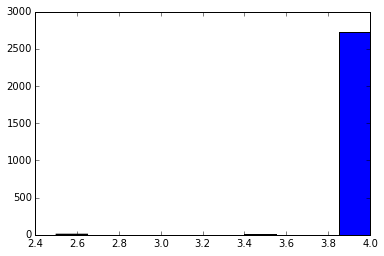

In [82]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(outputs)

(array([  16.,   46.,  113.,  264.,    0.,  496.,  798.,  707.,  254.,   44.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

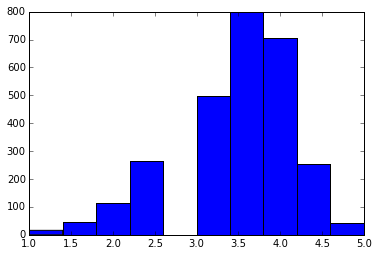

In [80]:
plt.hist(validation_labels.values)